# Part1 : Convex hull of feasible payoffs

<img src = "Images/hull.png">

### the input representation:
#### first line:
number of player1 strategies, number of player2 strategies
#### N lines
The utility matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
def read_input(path):
    f = open(path, 'r')
    N1, N2 = [int(i) for i in f.readline().split()]

    utilities = []
    c = 0
    for i in range(N1):
        inp = f.readline().split()
        for k in inp:
            utilities.append(tuple([int(j) for j in k.split(',')]))
    return utilities, N1*N2

In [4]:
def is_left(P0, P1, P):
    return (P1[0] - P0[0])*(P[1] - P0[1]) - (P[0] - P0[0])*(P1[1] - P0[1])
    
def convex_hull_points(points, N):
    points.sort()
    minmax = minmin = 0
    maxmin = maxmax = N-1
    i = 1
    while points[i][0] == points[0][0] : i += 1
    minmax = i-1
    i = N-2
    while points[i][0] == points[N-1][0] : i -= 1
    maxmin = i+1
    ## the lower hull
    hull = [points[minmin]]
    i = minmax
    while i < maxmin :
        i += 1
        if is_left(points[minmin], points[maxmin], points[i]) > 0: continue
        while(len(hull) > 1):
            if is_left(hull[-2], hull[-1], points[i]) > 0 : break
            else: hull.pop()
        hull.append(points[i])

    
    ## the upper hull
    if maxmin != maxmax : hull.append(points[maxmax])
    i = maxmin
    while(i > minmax):
        i -= 1
        if is_left(points[maxmax], points[minmax], points[i]) > 0: continue
        while(len(hull) > 1):
            if is_left(hull[-2], hull[-1], points[i]) > 0 : break
            else: hull.pop()
        hull.append(points[i])
        
    if minmin != minmax : hull.append(points[minmin])
    
    return hull

In [5]:
def plot_convex_hull(utilities, points):
    u = np.array(utilities)
    plt.plot(u[:,0], u[:,1], 'o')
    
    for i in range(len(points)-1):
        plt.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], 'r-')

## Example 1

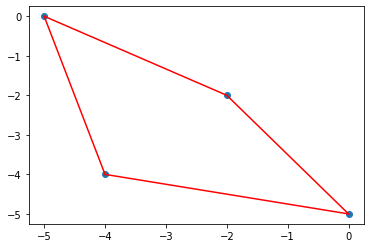

In [7]:
utilities, N = read_input('Test_Cases/test2_1.txt')
points = convex_hull_points(utilities, N)
plot_convex_hull(utilities, points)

the pareto optimal pure strategies depicted with orange color

## Example 2

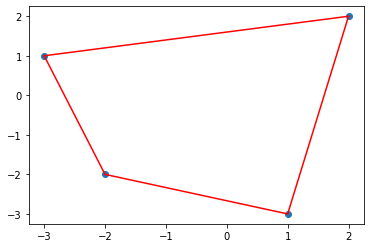

In [8]:
utilities, N = read_input('Test_Cases/test2_2.txt')
points = convex_hull_points(utilities, N)
plot_convex_hull(utilities, points)

## Example 3

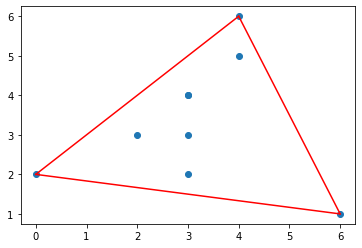

In [9]:
utilities, N = read_input('Test_Cases/test2_3.txt')
points = convex_hull_points(utilities, N)
plot_convex_hull(utilities, points)